An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to used below. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Below we: 

1. Create a graph of the record high and record low temperatures by day of the year over the period 2005-2014.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Take care of leap days (i.e. February 29th).

The data used is for location near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
%matplotlib notebook

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

<IPython.core.display.Javascript object>


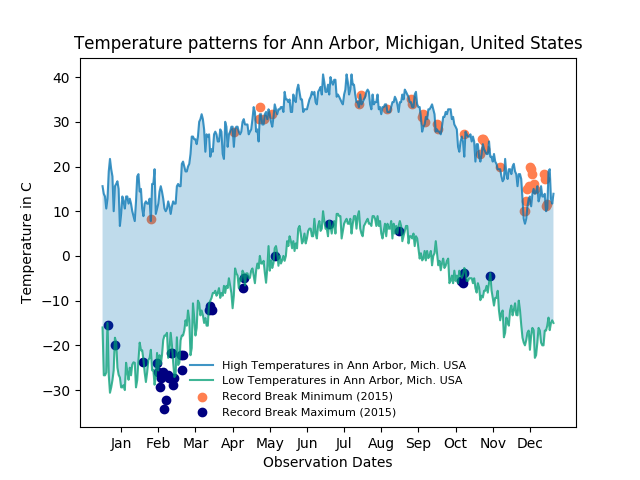

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def high_low_temps(binsize, hashid):

    df_og = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'.format(binsize))

    df_noleap = df_og[df_og.Date.str.find('-02-29')==-1]
    
    df_noleap['Date'] = pd.to_datetime(df_noleap['Date'])
    df_noleap['Year'] = df_noleap['Date'].dt.year
    df_noleap['Month_Day'] = df_noleap['Date'].dt.strftime('%m-%d')
    
    df = df_noleap[df_noleap.Year!=2015]
    df_2015 = df_noleap[df_noleap.Year==2015]

    highs = df[df.Element=='TMAX'].groupby(['Month_Day'])['Data_Value'].max()
    lows = df[df.Element=='TMIN'].groupby(['Month_Day'])['Data_Value'].min()
        
    record_breaks_2015_high_dates = []
    record_breaks_2015_low_dates = []
    record_breaks_2015_highs = []
    record_breaks_2015_lows = [] 
    
    high_list=[]
    low_list=[]
        
    compare_rec_high = df_2015[df_2015.Element=='TMAX'].groupby(['Month_Day'])['Data_Value'].max()
    compare_rec_low = df_2015[df_2015.Element=='TMIN'].groupby(['Month_Day'])['Data_Value'].min()
    
    for d in highs.index:
        compare_high = compare_rec_high[compare_rec_high.index == d] 
        compare_low = compare_rec_low[compare_rec_low.index == d] 
        high_list.append(highs[d]/10)
        low_list.append(lows[d]/10)
        if compare_high[d]>highs[d]:
            record_breaks_2015_high_dates.append(highs.index.tolist().index(d))
            record_breaks_2015_highs.append(compare_high[d]/10)
        if compare_low[d]<lows[d]:
            record_breaks_2015_low_dates.append(lows.index.tolist().index(d))
            record_breaks_2015_lows.append(compare_low[d]/10)
    observation_dates = np.arange('2015-01-01','2016-01-01',dtype='datetime64[D]')
    observation_dates = list(map(pd.to_datetime,observation_dates)) 
    
    plt.style.use('seaborn-colorblind')
    
    plt.xlabel('Observation Dates')
    plt.xticks( np.linspace(15,15 + 30*11 , num = 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec') )
    plt.ylabel('Temperature in C')
    plt.title('Temperature patterns for Ann Arbor, Michigan, United States')

    plt.scatter(record_breaks_2015_high_dates,record_breaks_2015_highs, c='coral', label = 'Record Break Minimum (2015)')
    plt.scatter(record_breaks_2015_low_dates, record_breaks_2015_lows, c='navy', label = 'Record Break Maximum (2015)')
    plt.plot(high_list,'-', alpha = 0.75, label = 'High Temperatures in Ann Arbor, Mich. USA')
    plt.plot(low_list,'-', alpha = 0.75, label = 'Low Temperatures in Ann Arbor, Mich. USA')
    plt.legend(loc = 8, frameon=False, fontsize=8)

    plt.gca().fill_between(range(len(highs.index.tolist())), 
                       high_list, low_list,
                       alpha=0.25)
    #plt.scatter(record_breaks_2015_high_dates,record_breaks_2015_highs, c='orange', s=8)
    #plt.scatter(record_breaks_2015_low_dates,record_breaks_2015_lows, c='black', s=8)
    plt.legend(loc = 8, frameon=False, fontsize=8)

    
    return
high_low_temps(10,1)

In [3]:
plt.style.available

['grayscale',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-pastel',
 'classic',
 'seaborn-muted',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-poster',
 'ggplot',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-notebook',
 'bmh',
 'seaborn-talk',
 'fivethirtyeight',
 'seaborn']